SP02 Project

1. Reading image

In [264]:
import cv2 as cv
import numpy as np

In [265]:
data_pic = cv.imread("./DATA/rah.jpg")
dis_pic(data_pic)

In [266]:
# cv.imshow('image',data_pic)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [267]:
def dis_pic(pic_name):
    cv.imshow('image',pic_name)
    cv.waitKey(0)
    cv.destroyAllWindows()
    

2. Reading dimentions

In [268]:
data_pic_red = data_pic[:,:,1]
# dis_pic(data_pic_red)
filtered_pic = max_rgb_filter(data_pic)
# cv.imshow("Images", np.hstack([data_pic, f]))
# cv.waitKey(0)

In [269]:
def max_rgb_filter(image):
    (B, G, R) = cv.split(image)
    M = np.maximum(np.maximum(R, G), B)
    R[R < M] = 0
    G[G < M] = 0
    B[B < M] = 0

    return cv.merge([B, G, R])

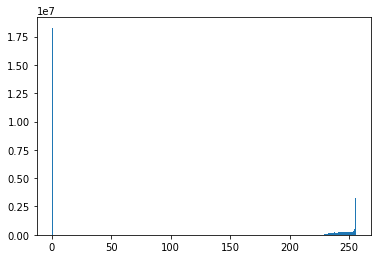

In [270]:
import matplotlib.pyplot as plt
plt.hist(filtered_pic.ravel(),256,[0,256]); plt.show()

In [271]:
bgr_planes = cv.split(data_pic)
print(bgr_planes)

[array([[84, 81, 80, ..., 40, 38, 35],
       [84, 81, 81, ..., 42, 44, 45],
       [82, 82, 84, ..., 34, 31, 31],
       ...,
       [83, 83, 81, ..., 37, 39, 40],
       [79, 83, 85, ..., 37, 39, 39],
       [77, 83, 86, ..., 36, 38, 37]], dtype=uint8), array([[ 4,  1,  0, ...,  4,  5,  2],
       [ 4,  1,  1, ...,  6, 11, 12],
       [ 2,  2,  4, ...,  0,  0,  0],
       ...,
       [ 3,  3,  1, ...,  0,  1,  2],
       [ 0,  3,  5, ...,  0,  1,  1],
       [ 0,  3,  6, ...,  0,  0,  0]], dtype=uint8), array([[255, 254, 253, ..., 228, 226, 223],
       [255, 254, 254, ..., 230, 232, 233],
       [255, 255, 255, ..., 222, 219, 219],
       ...,
       [255, 255, 255, ..., 229, 231, 232],
       [254, 255, 255, ..., 229, 231, 231],
       [252, 255, 255, ..., 228, 230, 229]], dtype=uint8)]


In [272]:
def dim(bgr_planes):
    if not type(bgr_planes) == list:
        return []
    return [len(bgr_planes)] + dim(bgr_planes[0])
dim(bgr_planes)

[3]

In [273]:
bgr_planes[0]

array([[84, 81, 80, ..., 40, 38, 35],
       [84, 81, 81, ..., 42, 44, 45],
       [82, 82, 84, ..., 34, 31, 31],
       ...,
       [83, 83, 81, ..., 37, 39, 40],
       [79, 83, 85, ..., 37, 39, 39],
       [77, 83, 86, ..., 36, 38, 37]], dtype=uint8)

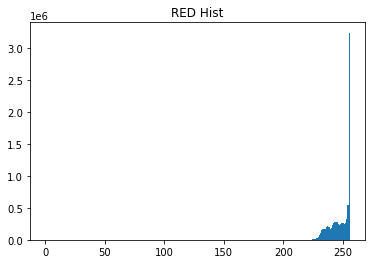

In [274]:
plt.title("RED Hist")
plt.hist(bgr_planes[2].ravel(),256,[0,256]) 
plt.show()


3242945.0

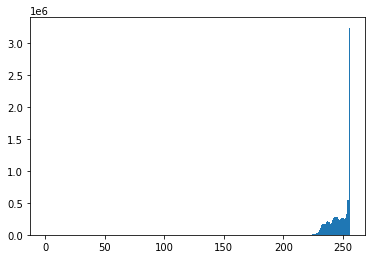

In [275]:
RED = plt.hist(bgr_planes[2].ravel(),256,[0,256]) 
len(RED)
max(RED[0])

In [276]:
# Finding image mean
# image_mean1 = sum(count_R.*binslocation_R)/sum(count_R);

# image_mean = sum(RED[0]*RED[1])/sum(RED[0])

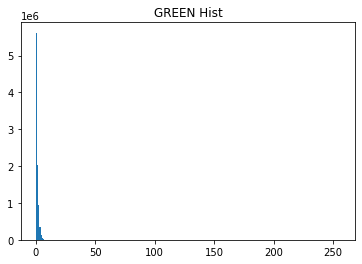

In [277]:
plt.title("GREEN Hist")
plt.hist(bgr_planes[1].ravel(),256,[0,256]) 
plt.show()


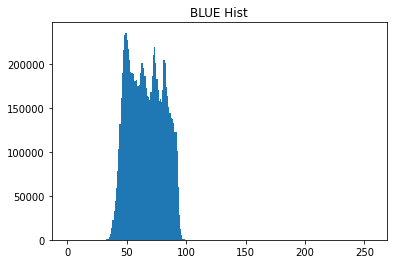

In [278]:
plt.title("BLUE Hist")
plt.hist(bgr_planes[0].ravel(),256,[0,256]) 
plt.show()


Finding MAX vale in R,G,B

In [279]:
bgr_planes[2][0]
print(bgr_planes[2][0].shape)
print(bgr_planes[2].shape)

(2268,)
(4032, 2268)


In [280]:
bgr_planes[2]

array([[255, 254, 253, ..., 228, 226, 223],
       [255, 254, 254, ..., 230, 232, 233],
       [255, 255, 255, ..., 222, 219, 219],
       ...,
       [255, 255, 255, ..., 229, 231, 232],
       [254, 255, 255, ..., 229, 231, 231],
       [252, 255, 255, ..., 228, 230, 229]], dtype=uint8)

BLUE index 50 value : 226364.0


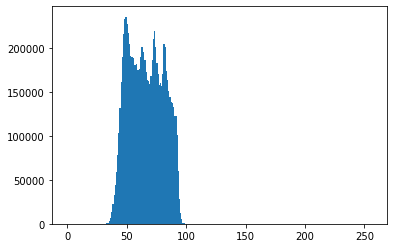

In [281]:
#BLUE BLUE[50] -> y value
BLUE = plt.hist(bgr_planes[0].ravel(),256,[0,256]) 
len(BLUE)
# max(BLUE[0])
print("BLUE index 50 value : {}".format(BLUE[0][50]))

In [282]:




#  RED/RED + BLUE
img_m = max(RED[0])/(max(RED[0])+BLUE[0][50])
print("SPO2 : {}".format(img_m*100))

SPO2 : 93.4752424762395


In [283]:
RED_avg = sum(RED[0])/len(RED[0])
print(sum(RED[0])/len(RED[0]))

35721.0


In [284]:
BLUE_avg = sum(BLUE[0])/len(BLUE[0])

In [285]:
img_mm = RED_avg/(RED_avg+BLUE_avg)
print("SPO2 average : {}".format(img_mm*100))

SPO2 average : 50.0
